In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
RANDOM_SEED = 42

In [8]:
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [9]:
df = pd.read_csv('./cherry-blossoms.csv', index_col='Years', usecols=['Years', 'Yoshino peak bloom date'])

In [10]:
df.head()

,Yoshino peak bloom date
Years,
1921,79
1922,97
1923,99
1924,104
1925,86


In [11]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train,test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [12]:
def create_dataset(X,y,Tx=1):
    Xs, ys = [], []
    for i in range(len(X) - Tx):
        v = X.iloc[i:(i+Tx)].values
        Xs.append(v)
        ys.append(y.iloc[i + Tx])
    return np.array(Xs), np.array(ys)   

In [13]:
Tx = 10
X_train, y_train = create_dataset(train, train['Yoshino peak bloom date'], Tx)
X_test, y_test = create_dataset(test, test['Yoshino peak bloom date'], Tx)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(66, 10, 1) (66,)
(10, 10, 1) (10,)


In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [61]:
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test)
)

- 0s 708us/sample - loss: 495.6956 - val_loss: 424.1983
Epoch 116/300
66/66 [==============================] - 0s 677us/sample - loss: 465.0680 - val_loss: 350.1752
Epoch 117/300
66/66 [==============================] - 0s 717us/sample - loss: 438.8550 - val_loss: 163.1928
Epoch 118/300
66/66 [==============================] - 0s 726us/sample - loss: 414.5080 - val_loss: 94.1358
Epoch 119/300
66/66 [==============================] - 0s 760us/sample - loss: 393.1216 - val_loss: 63.0671
Epoch 120/300
66/66 [==============================] - 0s 705us/sample - loss: 368.8207 - val_loss: 83.2491
Epoch 121/300
66/66 [==============================] - 0s 780us/sample - loss: 345.0767 - val_loss: 149.7772
Epoch 122/300
66/66 [==============================] - 0s 723us/sample - loss: 327.0087 - val_loss: 232.0113
Epoch 123/300
66/66 [==============================] - 0s 742us/sample - loss: 308.0597 - val_loss: 202.0897
Epoch 124/300
66/66 [==============================] - 0s 756us/sample - lo

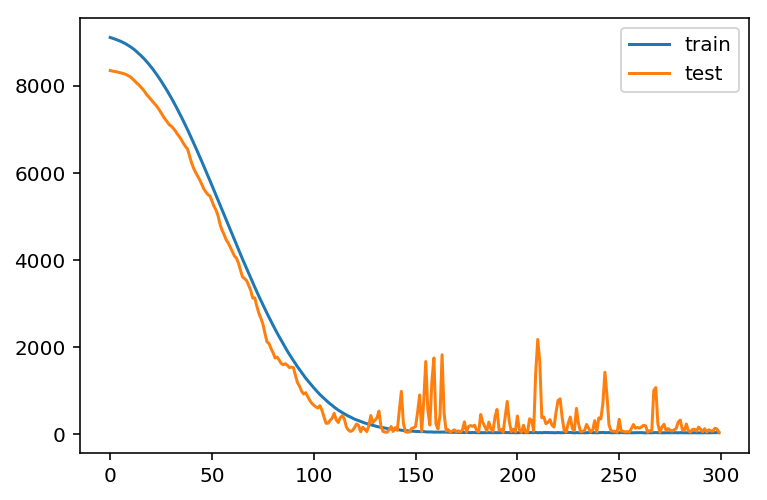

In [62]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [63]:
y_pred = model.predict(X_test)

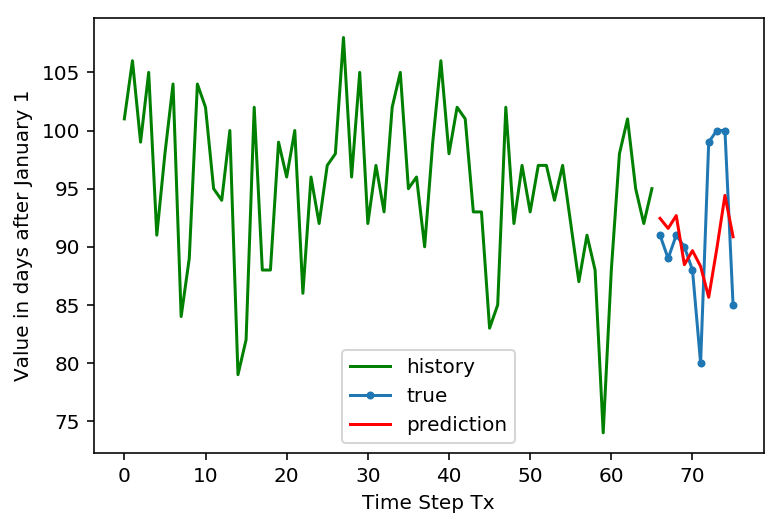

In [64]:
# put the loss in context
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value in days after January 1')
plt.xlabel('Time Step Tx')
plt.legend()
plt.show()